In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
df=pd.read_csv(r"C:\Users\Rudraksh Kansal\OneDrive - IIT Kanpur\IITK Study\Data Science\Iris Flower\Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop("Id",axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Species'])
df['Species'] = labelEncoder.transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X=df.drop(['Species'],axis=1)
Y=df['Species']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SepalLengthCm'),
  Text(1, 0, 'SepalWidthCm'),
  Text(2, 0, 'PetalLengthCm'),
  Text(3, 0, 'PetalWidthCm')])

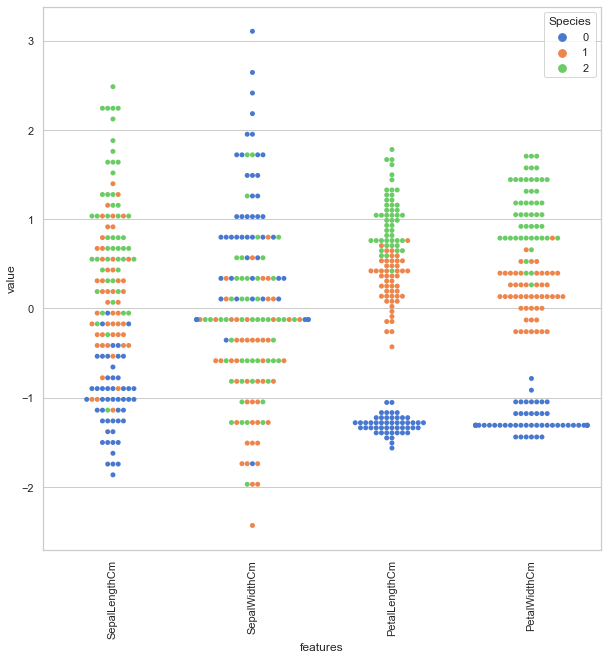

In [7]:
sns.set(style="whitegrid", palette="muted")
data_dia = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Species",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Species", data=data)

plt.xticks(rotation=90)

<AxesSubplot:>

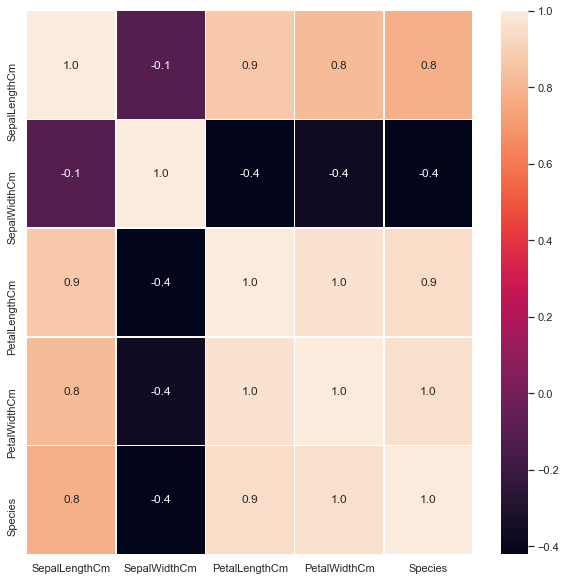

In [8]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [9]:
# high corelation between
# petal length and petal width
# petal length and species
# sepal width has least corelation with species

Accuracy is:  1.0


<AxesSubplot:>

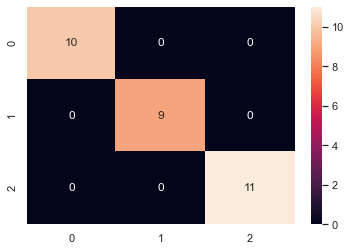

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

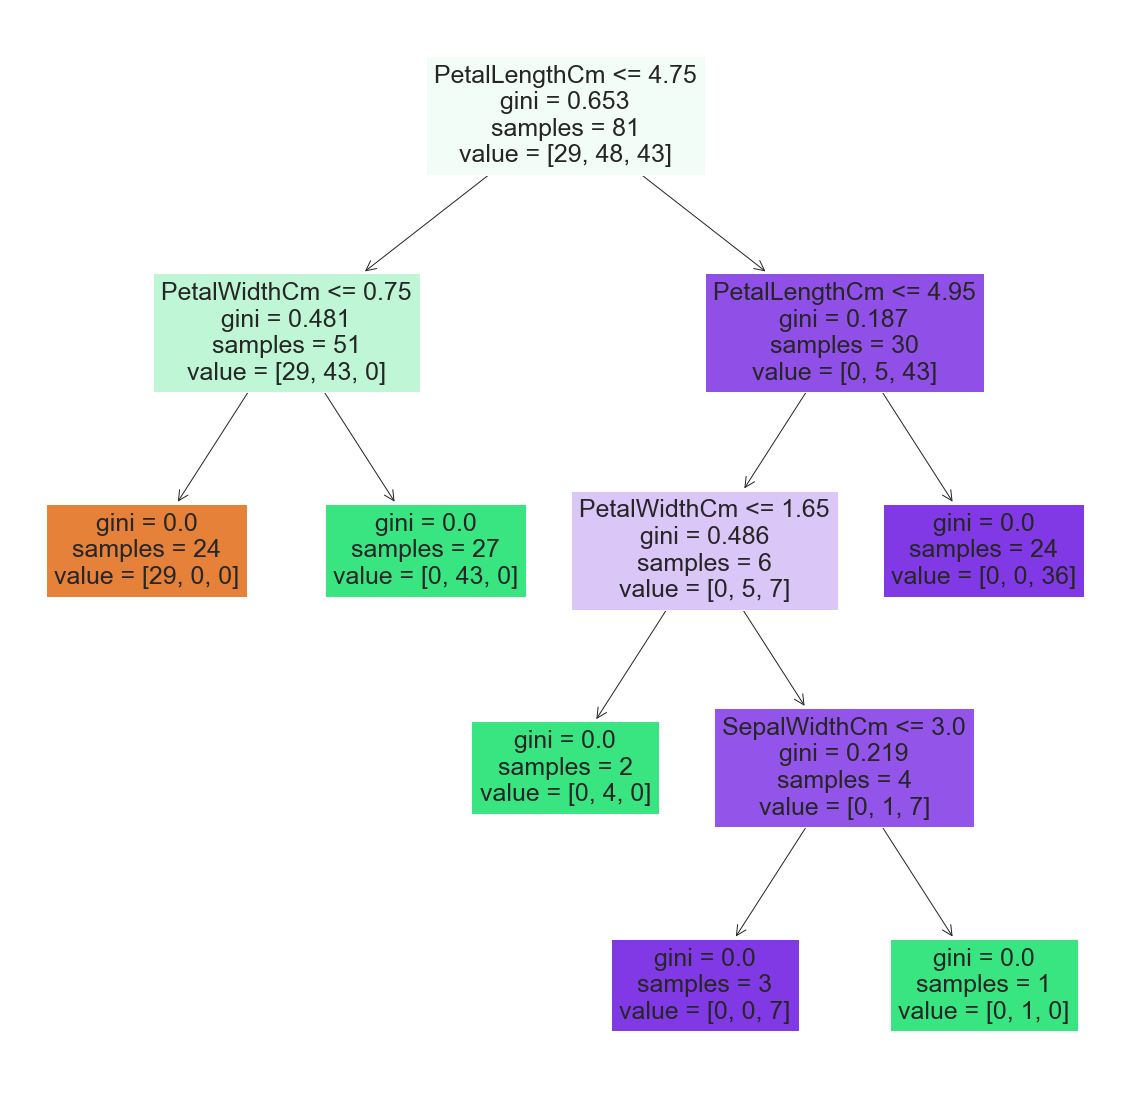

In [11]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_rf.estimators_[0], feature_names=X.columns, filled=True)